<a href="https://colab.research.google.com/github/suremmieyy/Student-Enrollment-Prediction/blob/main/code_for_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
student_math = pd.read_csv('student_math_clean.csv')
student_performance = pd.read_csv('student_performance_data.csv')
student_enrollment = pd.read_csv('dataset (1).csv')

In [ ]:
combined_data = pd.concat([student_math, student_performance, student_enrollment], axis=1)

print(combined_data.head())

   student_id school sex   age address_type              family_size  \
0         1.0     GP   F  18.0        Urban           Greater than 3   
1         2.0     GP   F  17.0        Urban           Greater than 3   
2         3.0     GP   F  15.0        Urban  Less than or equal to 3   
3         4.0     GP   F  15.0        Urban           Greater than 3   
4         5.0     GP   F  16.0        Urban           Greater than 3   

     parent_status               mother_education  \
0            Apart               higher education   
1  Living together  primary education (4th grade)   
2  Living together  primary education (4th grade)   
3  Living together               higher education   
4  Living together            secondary education   

                father_education mother_job  ...  \
0               higher education    at_home  ...   
1  primary education (4th grade)    at_home  ...   
2  primary education (4th grade)    at_home  ...   
3               5th to 9th grade     hea

In [ ]:
combined_data.rename(columns={
    'Age': 'Age',
    'sex': 'gender',
    'Age': 'age',
    'Gender': 'Gender'
}, inplace=True)

print(combined_data.columns)

Index(['student_id', 'school', 'gender', 'age', 'address_type', 'family_size',
       'parent_status', 'mother_education', 'father_education', 'mother_job',
       'father_job', 'school_choice_reason', 'guardian', 'travel_time',
       'study_time', 'class_failures', 'school_support', 'family_support',
       'extra_paid_classes', 'activities', 'nursery_school', 'higher_ed',
       'internet_access', 'romantic_relationship', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade', 'StudentID', 'Gender',
       'age', 'StudyHoursPerWeek', 'AttendanceRate', 'GPA', 'Major',
       'PartTimeJob', 'ExtraCurricularActivities', 'Marital status',
       'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Disp

In [ ]:

features = ['Age at enrollment', 'StudyHoursPerWeek', 'AttendanceRate',
            'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Tuition fees up to date']

X = combined_data[features]
y = combined_data['Target']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.71      0.74      0.72       284
    Enrolled       0.38      0.25      0.30       159
    Graduate       0.79      0.87      0.83       442

    accuracy                           0.71       885
   macro avg       0.62      0.62      0.61       885
weighted avg       0.69      0.71      0.70       885

Confusion Matrix:
 [[209  33  42]
 [ 59  39  61]
 [ 28  31 383]]
Accuracy Score: 0.7129943502824859


In [ ]:
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation accuracy scores: [0.72542373 0.7220339  0.72881356 0.72429379 0.72171946]
Mean cross-validation accuracy: 0.7244568857529974


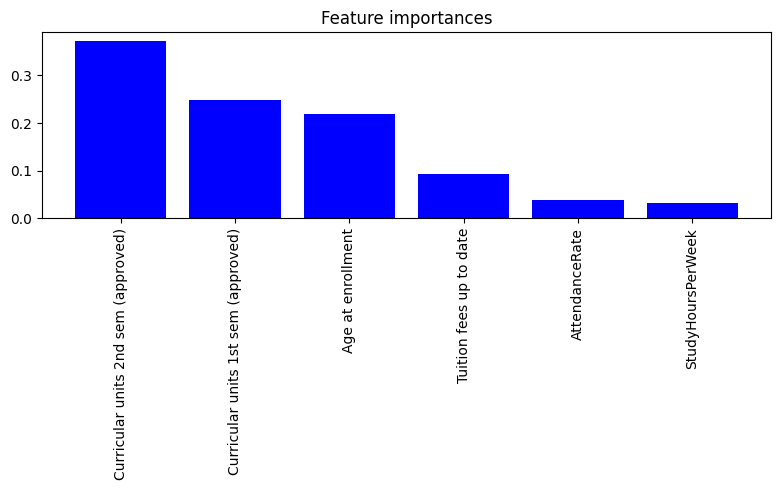

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
combined_data = combined_data.drop(columns=['student_id', 'address_type'])

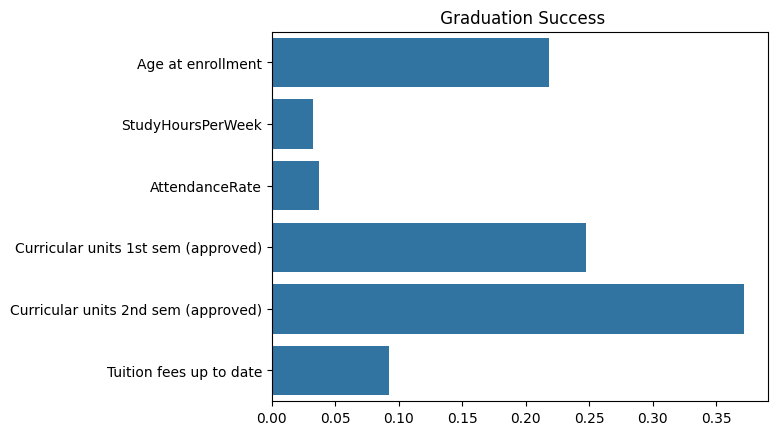

In [ ]:
sns.barplot(x=importances, y=features)
plt.title(' Graduation Success')
plt.show()